<a href="https://colab.research.google.com/github/kamilenovaes/machine-learning-python/blob/main/notebooks/08-knn-classification.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# K-Nearest Neighbors Classifier (KNN)

## 🎯 Objetivos

*   Usar K-Nearest neighbors para classificar dados
*   Aplicar o classificador KNN em um conjunto de dados do mundo real



Carregar um conjunto de dados de clientes de telecomunicações, preparar as variáveis e treinar um classificador **K-Nearest Neighbors (KNN)** para prever a categoria do cliente (`custcat`).

**Foco:**
- Por que normalizar os dados é essencial no KNN
- Como treinar, prever e medir acurácia
- Como escolher o hiperparâmetro **k** observando o desempenho


## 1. Importar bibliotecas

In [ ]:
# opcional
#!pip install numpy==2.2.0
#!pip install pandas==2.2.3
#!pip install scikit-learn==1.6.0
#!pip install matplotlib==3.9.3
#!pip install seaborn==0.13.2

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score
%matplotlib inline

## 2. Sobre o dataset

Imagine que uma operadora de telecom segmentou sua base de clientes de acordo com padrões de uso e serviços contratados. Nosso objetivo é prever a **categoria do cliente** (`custcat`) a partir de atributos como tempo de contrato, idade, renda etc.

- `custcat` é a variável-alvo (classes 1–4)
- As demais colunas são **features** (variáveis de entrada)


### 3. Carregar os dados

In [2]:
df = pd.read_csv('https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBMDeveloperSkillsNetwork-ML0101EN-SkillsNetwork/labs/Module%203/data/teleCust1000t.csv')
df.head()

,region,tenure,age,marital,address,income,ed,employ,retire,gender,reside,custcat
0,2,13,44,1,9,64.0,4,5,0.0,0,2,1
1,3,11,33,1,7,136.0,5,5,0.0,0,6,4
2,3,68,52,1,24,116.0,1,29,0.0,1,2,3
3,2,33,33,0,12,33.0,2,0,0.0,1,1,1
4,2,23,30,1,9,30.0,1,2,0.0,0,4,3


## 4. Análise breve

Primeiro, vamos ver quantos exemplos existem em cada classe de `custcat` (distribuição das classes).

In [3]:
df['custcat'].value_counts()

,count
custcat,
3,281
1,266
4,236
2,217


Pela contagem acima, conseguimos afirmar que temos registros de 281 clientes que optaram pelos *Serviços Plus*, 266 pelos *Serviços Básicos*, 236 pelos *Serviços Totais* e 217 pelos *Serviços Eletrônicos*. Assim, observa-se que o conjunto de dados está, em sua maioria, **equilibrado** entre as diferentes classes e não requer medidas especiais para compensar o viés de classe.

Também vamos olhar uma **matriz de correlação** para ter uma noção de quais variáveis se relacionam mais entre si e com a variável-alvo. *Atenção:* correlação não implica causalidade, e em classificação ela é só um indício inicial.

<Axes: >

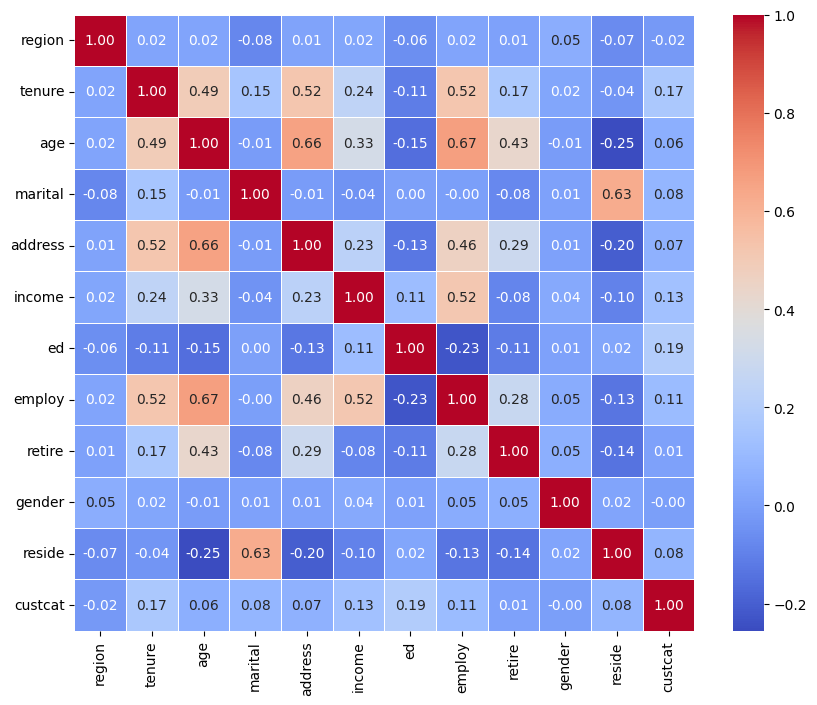

In [4]:
correlation_matrix = df.corr()

plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f', linewidths=0.5)

Na matriz, alguns pares de variáveis aparecem mais correlacionados. Isso pode indicar redundância (variáveis parecidas) ou relação mais forte com o problema.

In [5]:
correlation_values = abs(df.corr()['custcat'].drop('custcat')).sort_values(ascending=False)
correlation_values

,custcat
ed,0.193864
tenure,0.166691
income,0.134525
employ,0.110011
marital,0.083836
reside,0.082022
address,0.067913
age,0.056909
region,0.023771
retire,0.008908


Isso nos mostra que as características `retire` e `gender` têm o menor efeito em `custcat`, enquanto `ed` e `tenure` têm o maior efeito.

## 5. Separar variáveis de entrada (X) e alvo (y)

Vamos construir:
- **X**: todas as colunas *exceto* `custcat`
- **y**: apenas `custcat`


In [6]:
X = df.drop('custcat',axis=1)
y = df['custcat']

## 6. Normalizar os dados (muito importante no KNN)

No **KNN**, a “distância” entre pontos é o coração do algoritmo. Se uma feature estiver em escala muito maior que as outras (ex.: renda vs. binário 0/1), ela domina a distância.

Por isso, aplicamos **padronização** (média 0, desvio 1) com `StandardScaler`.

In [7]:
X_norm = StandardScaler().fit_transform(X)

### 6.1. Separar treino e teste

In [8]:
X_train, X_test, y_train, y_test = train_test_split(X_norm, y, test_size=0.2, random_state=4)

## 7. Classificação com KNN

Com os dados normalizados e separados, treinamos o classificador KNN.

📌 Para prever a classe de um ponto, o KNN olha os **k vizinhos mais próximos** e faz uma “votação”.

### 7.1. Treinamento (escolhendo um k inicial)

In [9]:
k = 3
#Train Model and Predict
knn_classifier = KNeighborsClassifier(n_neighbors=k)
knn_model = knn_classifier.fit(X_train,y_train)

### 7.2. Predição

In [10]:
yhat = knn_model.predict(X_test)

### 7.3. Avaliação (acurácia)

In [11]:
print("Test set Accuracy: ", accuracy_score(y_test, yhat))

Test set Accuracy:  0.315


#### Exercício 1 — testar outro valor de k

In [12]:
k = 6
knn_model_6 = KNeighborsClassifier(n_neighbors = k).fit(X_train,y_train)
yhat6 = knn_model_6.predict(X_test)
print("Test set Accuracy: ", accuracy_score(y_test, yhat6))

Test set Accuracy:  0.31


### 7.4. Como escolher um bom k

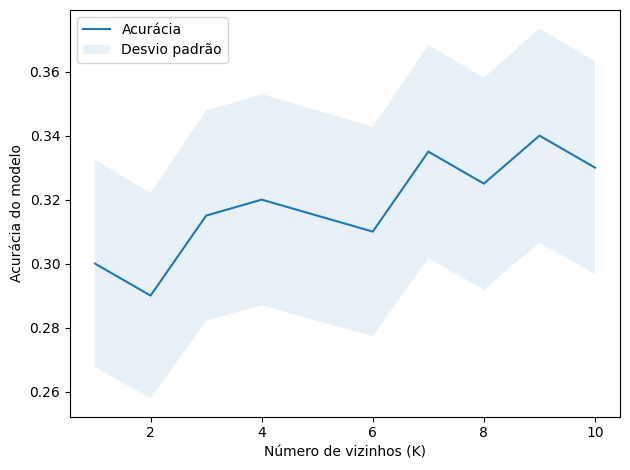

Melhor k (1..10) no TESTE: k=9 | acurácia=0.340


In [13]:
# Função utilitária: avalia o KNN para k = 1..K_max
def avaliar_knn_por_k(K_max, usar_treino=False):
    acc = np.zeros((K_max))
    std_acc = np.zeros((K_max))

    X_eval = X_train if usar_treino else X_test
    y_eval = y_train if usar_treino else y_test

    for k in range(1, K_max + 1):
        modelo = KNeighborsClassifier(n_neighbors=k).fit(X_train, y_train)
        yhat = modelo.predict(X_eval)

        acc[k - 1] = accuracy_score(y_eval, yhat)
        std_acc[k - 1] = np.std(yhat == y_eval) / np.sqrt(yhat.shape[0])

    # Curva de acurácia (com faixa aproximada de variação)
    plt.plot(range(1, K_max + 1), acc)
    plt.fill_between(
        range(1, K_max + 1),
        acc - 1 * std_acc,
        acc + 1 * std_acc,
        alpha=0.10
    )
    plt.legend(('Acurácia', 'Desvio padrão'))
    plt.ylabel('Acurácia do modelo')
    plt.xlabel('Número de vizinhos (K)')
    plt.tight_layout()
    plt.show()

    melhor_k = int(acc.argmax() + 1)
    melhor_acc = float(acc.max())
    return melhor_k, melhor_acc

# 1) Começamos testando k até 10 (avaliando no conjunto de teste)
melhor_k_10, melhor_acc_10 = avaliar_knn_por_k(10, usar_treino=False)
print(f"Melhor k (1..10) no TESTE: k={melhor_k_10} | acurácia={melhor_acc_10:.3f}")


### 7.5. Acurácia para diferentes valores de k
Vamos treinar vários modelos variando **k** e observar a acurácia no conjunto de teste.

- **k muito pequeno** → tende a *overfitting* (alta variância)
- **k muito grande** → tende a *underfitting* (alto viés)


Como a curva de acurácia ainda está subindo no maior k testado, vale ampliar o intervalo de k para verificar se existe um pico e depois queda.

#### Exercício 2 — ampliar a busca de k

Agora vamos repetir o processo, mas buscando o melhor **k** em dois intervalos maiores:

- k = 1..30  
- k = 1..100  

📌 A seleção deve ser feita pela **acurácia no conjunto de teste** (não no treino).


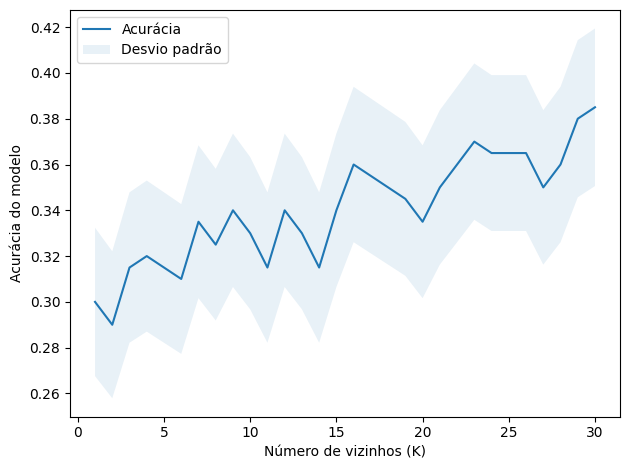

Melhor k (1..30) no TESTE: k=30 | acurácia=0.385


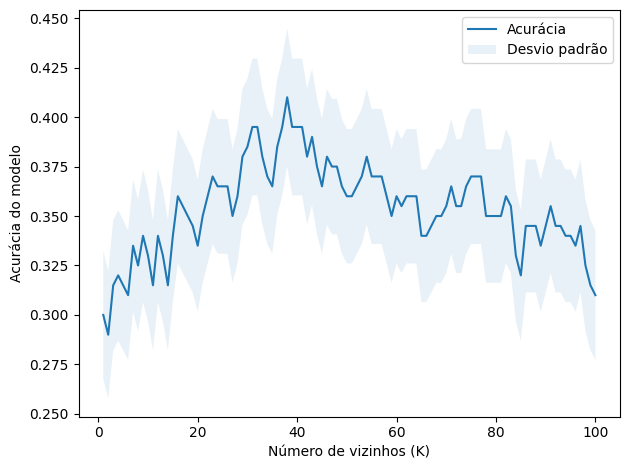

Melhor k (1..100) no TESTE: k=38 | acurácia=0.410


In [14]:
for K_max in [30, 100]:
    melhor_k, melhor_acc = avaliar_knn_por_k(K_max, usar_treino=False)
    print(f"Melhor k (1..{K_max}) no TESTE: k={melhor_k} | acurácia={melhor_acc:.3f}")

#### Exercício 3 — acurácia no *treino* para vários k
Agora vamos olhar a acurácia no **treino** para entender como o aumento de k reduz a “capacidade” do modelo de se ajustar aos dados.

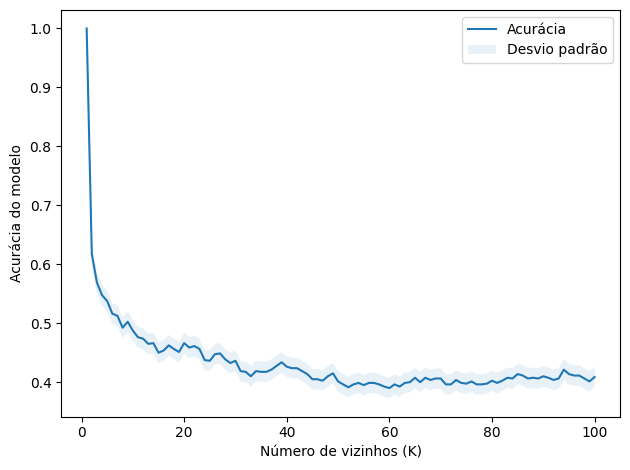

Melhor k (1..100) no TREINO: k=1 | acurácia=1.000


In [15]:
# Acurácia no TREINO para k = 1..100 (para visualizar tendência)
melhor_k_treino, melhor_acc_treino = avaliar_knn_por_k(100, usar_treino=True)
print(f"Melhor k (1..100) no TREINO: k={melhor_k_treino} | acurácia={melhor_acc_treino:.3f}")

#### Exercício 4 — por que a acurácia de treino piora quando k aumenta?

**Resposta:** quando `k` aumenta, cada predição usa uma média/votação com mais vizinhos. Isso **suaviza** a fronteira de decisão e reduz a sensibilidade a pontos individuais.

- Com **k pequeno**, o modelo consegue “memorizar” melhor o treino → acurácia de treino alta (mas risco de *overfitting*).
- Com **k grande**, o modelo fica mais “conservador” e pode começar a prever a classe majoritária em regiões grandes → **underfitting** e queda da acurácia até no treino.


#### Exercício 5 — por que o KNN pode ter desempenho baixo aqui?

**Possíveis motivos:**
- **Classes se sobrepõem** (features não separam bem as categorias) → qualquer modelo terá limite de desempenho.
- **KNN sofre em alta dimensionalidade** (*curse of dimensionality*): distâncias ficam menos informativas e os “vizinhos” deixam de ser realmente próximos.
- **Ruído/outliers** ou features pouco relevantes atrapalham o cálculo de distância.
- **Métrica de distância** padrão (euclidiana) pode não ser a melhor para esse conjunto.
- Pode faltar **engenharia de features** (transformações, interações, variáveis derivadas) ou até um modelo mais adequado (ex.: árvores, SVM, regressão logística regularizada).
